<img src='ClusterProjectCover.jpg' style = 'width:1100px;height:700px'/>

<img src='ExecSumm.jpg' style = 'width:1100px;height:700px'/>

<a id='back'></a>
### Quick Links to Sections within this Notebook

- [Acquire Data](#AD)
- [Prepare Data](#PD)
- [Explore Data](#EX)
- [Split Data](#SD)
- [Hypothesis Testing](#HY)
- [Cluster Data](#CL)
- [Hypothesis Testing on Clusters](#HC)
- [Scale Data](#Scale)
- [Modeling](#Model)
- [Model on Test Data](#TD)
- [Conclusion](#Concl)

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import wrangle
from acquire import get_zillow_data
# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#Modeling Imports
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans, dbscan
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression 
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

# modeling methods
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns', 80)

<a id='AD'></a>
## ```Acquire Data```
[back](#back) /  [next](#PD)

In [2]:
acquired_zillow =get_zillow_data()

In [3]:
acquired_zillow.shape

(77575, 69)

In [4]:
acquired_zillow.describe()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,77575.000000,7.757500e+04,7.757500e+04,25006.000000,206.000000,50.000000,77575.000000,77575.000000,15.000000,49809.000000,76960.000000,614.0,6035.000000,77375.000000,73920.000000,42.000000,3027.000000,6035.000000,386.000000,77575.000000,8287.000000,76960.000000,25517.000000,25517.000000,1539.0,49570.000000,7.757500e+04,7.757500e+04,6.931800e+04,16173.0,869.000000,465.0,1074.0,15078.0,77575.000000,7.757500e+04,76103.000000,77575.000000,30973.000000,77525.000000,77575.00000,50.0,10105.000000,222.000000,50703.000000,2393.000000,70.000000,77306.000000,17596.000000,172.0,7.746000e+04,7.757400e+04,77575.0,7.757300e+04,77570.000000,2900.000000,7.732800e+04,77575.000000
mean,38787.000000,1.495352e+06,1.300630e+07,1.812045,7.388350,679.720000,2.298518,3.053252,3.933333,6.533779,2.316385,66.0,1366.198012,1784.938998,1760.287297,1388.761905,2354.491245,1381.426678,2082.500000,6048.812568,1.191263,2.250104,1.815339,350.055845,1.0,3.921707,3.400837e+07,-1.182037e+08,2.997445e+04,1.0,517.930955,1.0,1.0,1.0,261.824467,6.049123e+07,33683.390392,2534.535933,187730.297162,96586.677033,1.47612,7.0,1.009599,6.040541,1.110309,305.460928,216.385714,1968.610936,1.434246,1.0,1.892815e+05,4.901447e+05,2016.0,3.011453e+05,5995.821528,14.088276,6.049666e+13,0.016802
std,22394.117903,8.609703e+05,3.478021e+06,2.965823,2.734542,689.703546,0.996700,1.140440,0.258199,1.722062,0.979684,0.0,670.803630,954.262540,934.364843,122.220874,1186.985442,725.904022,1240.382784,20.745309,0.491031,0.966479,0.588329,261.651602,0.0,3.594804,2.652878e+05,3.593826e+05,1.233076e+05,0.0,156.569664,0.0,0.0,0.0,5.141701,2.058768e+05,47212.856528,801.449852,165045.226146,3793.648751,2.82360,0.0,0.118578,0.557285,1.169967,238.735241,190.177514,23.793197,0.544518,0.0,2.304137e+05,6.538022e+05,0.0,4.927287e+05,7628.869090,2.181281,1.533376e+12,0.170743
min,0.000000,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,44.000000,128.000000,128.000000,1056.000000,598.000000,44.000000,380.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.0,1.000000,3.333953e+07,-1.194754e+08,2.360000e+02,1.0,24.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.00000,7.0,1.000000,4.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,19393.500000,7.521050e+05,1.153820e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,66.0,955.000000,1182.000000,1172.000000,1344.000000,1624.000000,956.000000,993.750000,6037.000000,1.000000,2.000000,2.000000,0.000000,1.0,2.000000,3.381463e+07,-1.184150e+08,5.700000e+03,1.0,424.000000,1.0,1.0,1.0,261.000000,6.037311e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.00000,7.0,1.000000,6.000000,1.000000,170.000000,61.500000,1953.000000,1.000000,1.0,8.418200e+04,2.068985e+05,2016.0,8.529300e+04,2712.630000,14.000000,6.037311e+13,-0.024311
50%,38787.000000,1.498195e+06,1.253053e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000

In [5]:
null_counts = acquired_zillow.isnull().sum().sort_values(ascending=False)
null_counts

buildingclassdesc       77560
buildingclasstypeid     77560
finishedsquarefeet13    77533
storydesc               77525
basementsqft            77525
                        ...  
assessmentyear              0
logerror                    0
transactiondate             0
propertylandusedesc         0
Unnamed: 0                  0
Length: 69, dtype: int64

### Takeaways:
##### There are numerous null values that need to be handled
#### Columns with too many nulls need to be dropped from the data frame.
##### There are many outliers so they either need to be removed or handled by using a RobustScaler when scaling the data.

<a id='PD'></a>
## ```Prepare Data```

[back](#back) |  [next](#EX)

In [6]:
df= wrangle.wrangle_zillow()

In [7]:
df.head() 

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,logerror,age_bin,taxrate,acres,acres_bin,tax_value_bin,land_tax_value_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
0,2.0,3.0,2107.0,6037,34222559.0,-118617387.0,45.0,249655.0,624139.0,374484.0,7659.36,-0.007357,40-50,1.227188,0.210239,0.2,"$650,000","$450,000",0.5,118.488372,0.4,40.891461,20-49,0.666667,1
1,2.0,4.0,1882.0,6037,34220261.0,-118616409.0,45.0,253000.0,660000.0,407000.0,8123.91,0.021066,40-50,1.230895,0.207415,0.2,"$900,000","$450,000",0.4,134.431456,0.4,45.047039,20-49,0.500000,1
2,2.0,4.0,1882.0,6037,34222491.0,-118616854.0,45.0,257591.0,542923.0,285332.0,6673.24,0.077174,40-50,1.229132,0.224977,0.2,"$550,000","$350,000",0.4,136.870882,0.4,29.115510,20-49,0.500000,1
3,2.0,3.0,1477.0,6037,34221864.0,-118615739.0,57.0,57968.0,78031.0,20063.0,1116.46,-0.041238,50-60,1.430790,0.259068,0.3,"< $80,000","< $50,000",0.3,39.247123,0.1,1.777847,1,0.666667,1
4,2.0,4.0,1918.0,6037,34220619.0,-118615253.0,57.0,167869.0,415459.0,247590.0,5239.85,-0.009496,50-60,1.261220,0.258012,0.3,"$450,000","$250,000",0.4,87.522941,0.3,22.029540,20-49,0.500000,1


In [8]:
# look at the first 5 rows of our new dataframe, transposed
df.head().T

,0,1,2,3,4
bathrooms,2,2,2,2,2
bedrooms,3,4,4,3,4
square_feet,2107,1882,1882,1477,1918
fips,6037,6037,6037,6037,6037
latitude,3.42226e+07,3.42203e+07,3.42225e+07,3.42219e+07,3.42206e+07
longitude,-1.18617e+08,-1.18616e+08,-1.18617e+08,-1.18616e+08,-1.18615e+08
age,45,45,45,57,57
structure_tax_value,249655,253000,257591,57968,167869
tax_value,624139,660000,542923,78031,415459
land_tax_value,374484,407000,285332,20063,247590


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69349 entries, 0 to 77549
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   bathrooms                  69349 non-null  float64 
 1   bedrooms                   69349 non-null  float64 
 2   square_feet                69349 non-null  float64 
 3   fips                       69349 non-null  int64   
 4   latitude                   69349 non-null  float64 
 5   longitude                  69349 non-null  float64 
 6   age                        69349 non-null  float64 
 7   structure_tax_value        69349 non-null  float64 
 8   tax_value                  69349 non-null  float64 
 9   land_tax_value             69349 non-null  float64 
 10  taxamount                  69349 non-null  float64 
 11  logerror                   69349 non-null  float64 
 12  age_bin                    69349 non-null  category
 13  taxrate                    6934

In [10]:
#There are no remaining null values

df.isna().sum().sum()

2367

### Creating some new features:
- bins for: age, square feet
- tax rate
- bath/bed ratio:  (bathroom count / bedroom count)
- acres (lotsizesquarefeet/43560)
- dollar per square foot
- within city of Los Angeles


In [11]:
df.head().T

,0,1,2,3,4
bathrooms,2,2,2,2,2
bedrooms,3,4,4,3,4
square_feet,2107,1882,1882,1477,1918
fips,6037,6037,6037,6037,6037
latitude,3.42226e+07,3.42203e+07,3.42225e+07,3.42219e+07,3.42206e+07
longitude,-1.18617e+08,-1.18616e+08,-1.18617e+08,-1.18616e+08,-1.18615e+08
age,45,45,45,57,57
structure_tax_value,249655,253000,257591,57968,167869
tax_value,624139,660000,542923,78031,415459
land_tax_value,374484,407000,285332,20063,247590


In [12]:
df.describe()

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,logerror,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,bath_bed_ratio,cola
count,69349.000000,69349.000000,69349.000000,69349.000000,6.934900e+04,6.934900e+04,69349.000000,6.934900e+04,6.934900e+04,6.934900e+04,69349.000000,69349.000000,69349.000000,69349.000000,69349.000000,69349.000000,69349.000000,69349.000000,69349.000000,69349.000000,69349.000000
mean,2.251821,3.010368,1730.667609,6049.348988,3.400252e+07,-1.181933e+08,47.974419,1.801867e+05,4.655554e+05,2.853687e+05,5675.169086,0.016308,1.302603,0.556232,0.208192,0.352691,99.144978,0.305529,40.628768,0.781380,0.229664
std,0.899962,0.984725,851.761626,20.857160,2.680495e+05,3.612545e+05,22.967324,1.762367e+05,4.551819e+05,3.270891e+05,5275.911173,0.164781,0.324705,1.567698,0.139998,0.186598,59.587759,0.145831,60.107456,0.287038,0.420620
min,1.000000,1.000000,500.000000,6037.000000,3.333953e+07,-1.194753e+08,1.000000,4.400000e+01,3.254000e+03,1.196000e+03,19.920000,-4.655420,0.009372,0.005418,0.000000,0.000000,0.039833,0.000000,0.005405,0.200000,0.000000
25%,2.000000,2.000000,1166.000000,6037.000000,3.380398e+07,-1.184091e+08,31.000000,8.313800e+04,2.034610e+05,8.253100e+04,2670.240000,-0.023758,1.162138,0.137741,0.100000,0.200000,62.566210,0.200000,6.317517,0.600000,0.000000
50%,2.000000,3.000000,1508.000000,6037.000000,3.401297e+07,-1.181627e+08,47.000000,1.338650e+05,3.550000e+05,2.031950e+05,4378.260000,0.006511,1.225351,0.167883,0.200000,0.400000,91.215385,0.300000,25.053753,0.750000,0.000000
75%,3.000000,4.000000,2048.000000,6059.000000,3.417439e+07,-1.179127e+08,63.000000,2.131850e+05,5.627710e+05,3.665770e+05,6772.530000,0.038048,1.336699,0.242815,0.200000,0.500000,123.867302,0.400000,51.414467,1.000000,0.000000
max,7.000000,7.000000,8909.000000,6111.000000,3.481877e+07,-1.175723e+08,139.000000,3.097672e+06,4.993132e+06,4.847224e+06,72122.200000,3.394544,9.805110,19.796350,0.700000,0.900000,1444.221106,0.900000,1604.525311,3.000000,1.000000


(array([2.0000e+00, 1.0000e+00, 2.3000e+01, 1.7000e+01, 1.3000e+02,
        6.5827e+04, 3.1170e+03, 1.2300e+02, 9.7000e+01, 1.2000e+01]),
 array([-4.65542038, -3.85042393, -3.04542749, -2.24043104, -1.4354346 ,
        -0.63043816,  0.17455829,  0.97955473,  1.78455118,  2.58954762,
         3.39454407]),
 <a list of 10 Patch objects>)

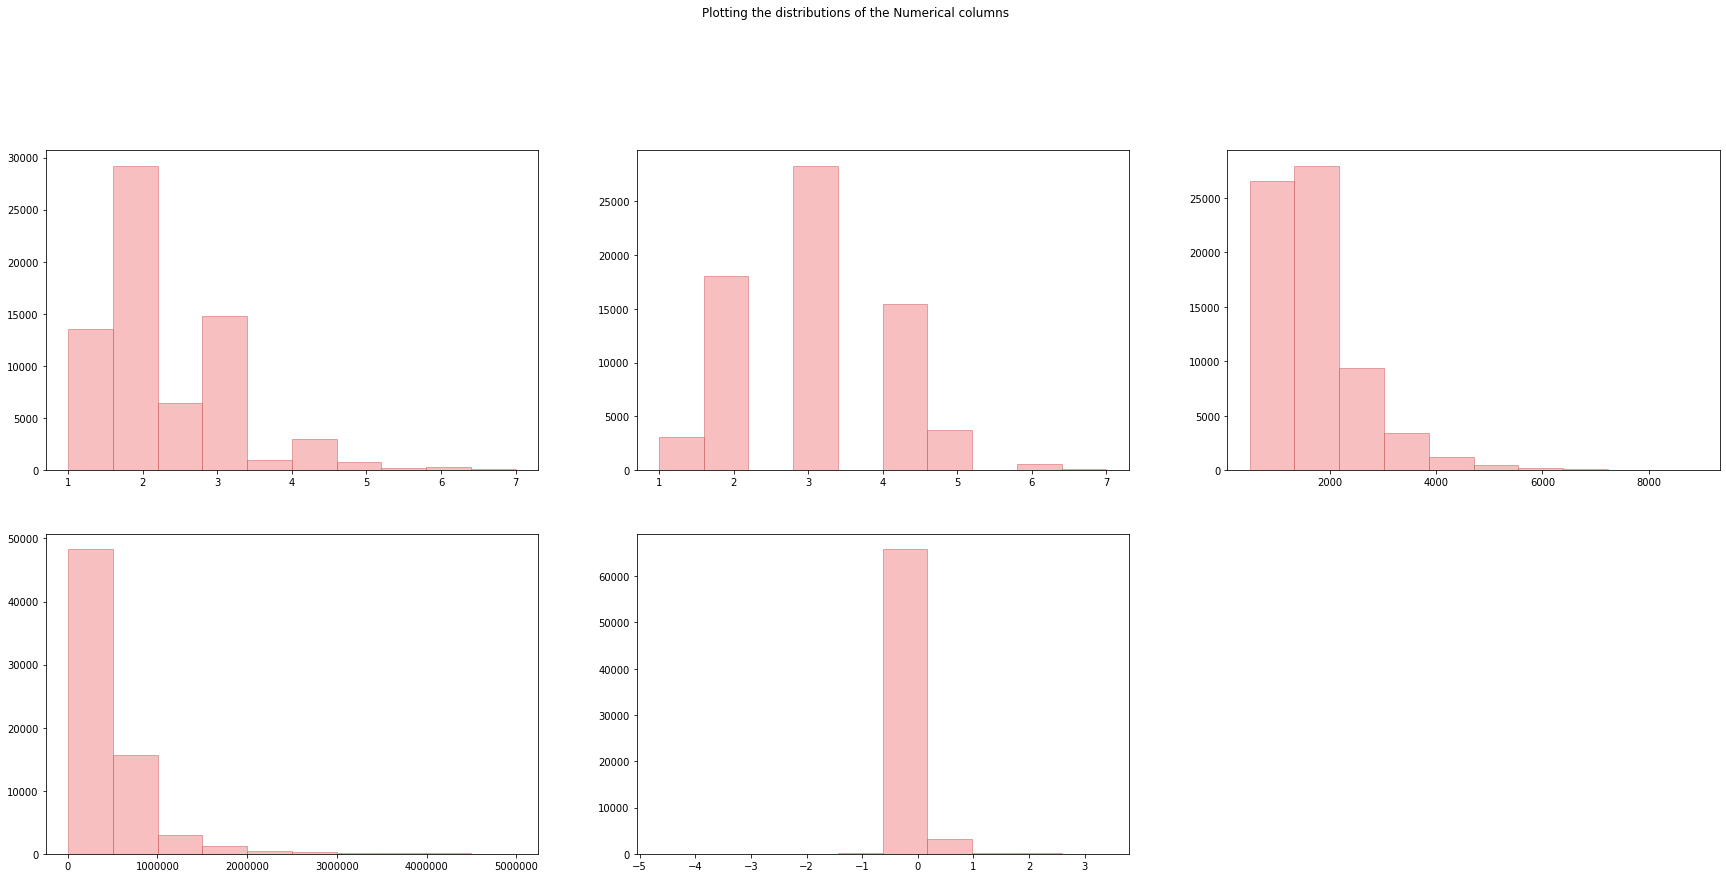

In [13]:
plt.figure(figsize=(30, 20))

plt.suptitle("Plotting the distributions of the Numerical columns")
# row, columns, index
plt.subplot(3, 3, 1)
plt.hist(df.bathrooms, edgecolor='indianred', alpha=0.5, color='lightcoral')
plt.subplot(3, 3, 2)
plt.hist(df.bedrooms, edgecolor='indianred', alpha=0.5, color='lightcoral')
plt.subplot(3, 3, 3)
plt.hist(df.square_feet, edgecolor='indianred', alpha=0.5, color='lightcoral')
plt.subplot(3, 3, 4)
plt.hist(df.tax_value, edgecolor='indianred', alpha=0.5, color='lightcoral')
plt.subplot(3, 3, 5)
plt.hist(df.logerror, edgecolor='indianred', alpha=0.5, color='lightcoral')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69349 entries, 0 to 77549
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   bathrooms                  69349 non-null  float64 
 1   bedrooms                   69349 non-null  float64 
 2   square_feet                69349 non-null  float64 
 3   fips                       69349 non-null  int64   
 4   latitude                   69349 non-null  float64 
 5   longitude                  69349 non-null  float64 
 6   age                        69349 non-null  float64 
 7   structure_tax_value        69349 non-null  float64 
 8   tax_value                  69349 non-null  float64 
 9   land_tax_value             69349 non-null  float64 
 10  taxamount                  69349 non-null  float64 
 11  logerror                   69349 non-null  float64 
 12  age_bin                    69349 non-null  category
 13  taxrate                    6934

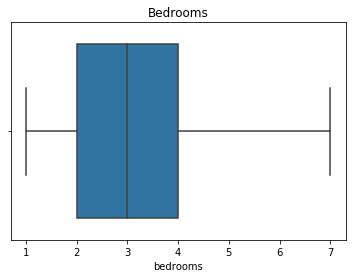

In [15]:
### Checking for Outliers:
sns.boxplot(df['bedrooms'])
plt.title('Bedrooms')
plt.show()

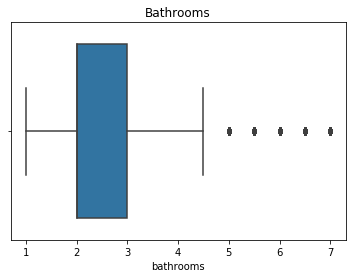

In [16]:
sns.boxplot(df['bathrooms'])
plt.title('Bathrooms')
plt.show()

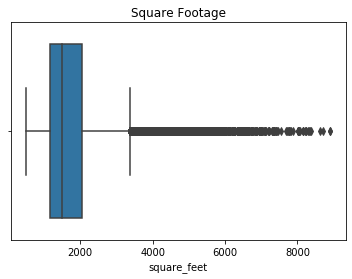

In [17]:
sns.boxplot(df['square_feet'])
plt.title('Square Footage')
plt.show()

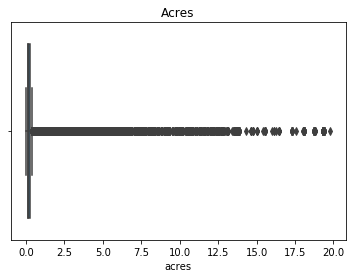

In [18]:
sns.boxplot(df['acres'])
plt.title('Acres')
plt.show()

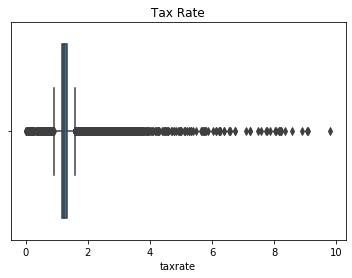

In [19]:
sns.boxplot(df['taxrate'])
plt.title('Tax Rate')
plt.show()

### Takeaways:  

Removing Outliers:

Remove extremes in bedrooms and baths (KEEP only 1-7 baths and 1-7 bedrooms)

remove square feet > 9000

remove lot size (acres) > 20 

Remove tax rate > 10% 

<a id='EX'></a>
## ```Explore Data```
[back](#back) | [next](#HY)

<a id='SD'></a>
#### ```Split Data```

In [20]:
train_validate, test = train_test_split(df, test_size=.30, random_state=123)
train, validate = train_test_split(train_validate, test_size=.20, random_state=123)

print("train observations: ", train.shape)
print("validate observations: ", validate.shape)
print("test observations: ", test.shape)

train observations:  (38835, 25)
validate observations:  (9709, 25)
test observations:  (20805, 25)


### Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Text(0.5, 1.0, 'County v. Log Error')

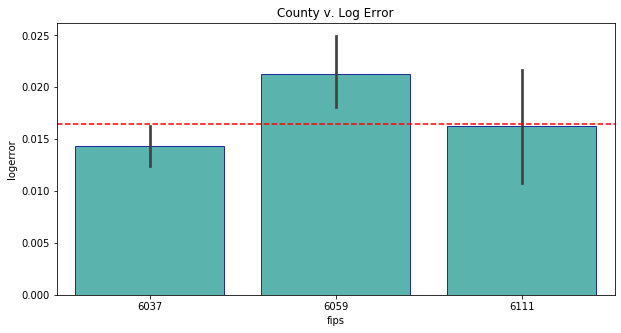

In [21]:
p = plt.figure(figsize=(10,5))
p = sns.barplot(train.fips, train.logerror, data=train, alpha=.8, color='lightseagreen', edgecolor = 'darkblue')
overall_rate = train.logerror.mean()
p = plt.axhline(overall_rate, ls='--', color='red', )
plt.title('County v. Log Error')

<a id='HY'></a>
## ```Hypothesis Testing - Anova```
[back](#back) | [next](#Pear)

#### Ho: There is no significant difference in logerror for properties in LA County vs Orange County vs Ventura County.  --> REJECT

#### Ha: Logerror is significantly different among the counties of LA County, Orange County and Ventura County.

In [22]:
α = 0.05
F, p = stats.f_oneway(train.logerror[train.fips == 6111], train.logerror[train.fips == 6037], train.logerror[train.fips == 6059])
F, p

(6.77954297552004, 0.00113814033427514)

In [23]:
null_hypothesis = 'there is no significant difference in logerror for properties in LA County vs Orange County vs Ventura County'

if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)


We reject the null hypothesis that there is no significant difference in logerror for properties in LA County vs Orange County vs Ventura County


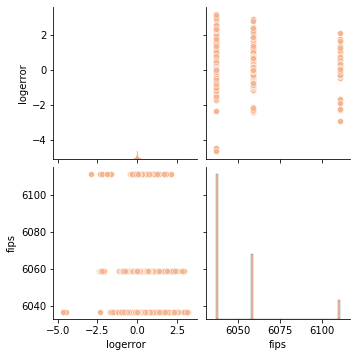

In [24]:
sns.set_palette("rocket_r")
sns.pairplot(train[['logerror', 'fips']])  

<a id='Pear'></a>
## ```Hypothesis Testing - Pearson R Correlation```
[back](#back) | [next](#CL) 


𝐻0: There is no difference in log error based on a properties square footage. <br>
𝐻𝑎: A properties square footage less than 2800 square footage have a lower log error than larger properties. 

In [25]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
null_hypothesis = "there is no difference in log error based on a properties square footage."

In [26]:
x1 = train[train.square_feet >= 2800].logerror
x2 = train[train.square_feet < 2800].logerror

In [27]:
t, p= stats.ttest_ind(x1, x2)

In [28]:
if p >  α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We reject the null hypothesis that there is no difference in log error based on a properties square footage.


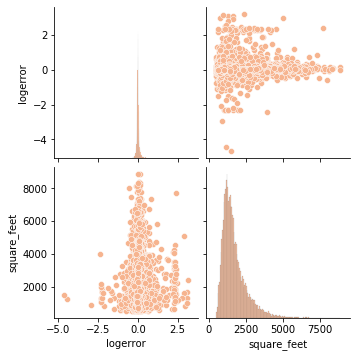

In [29]:
sns.set_palette("rocket_r")
sns.pairplot(train[['logerror', 'square_feet']])  

Text(0.5, 1.0, 'Acres v. Log Error')

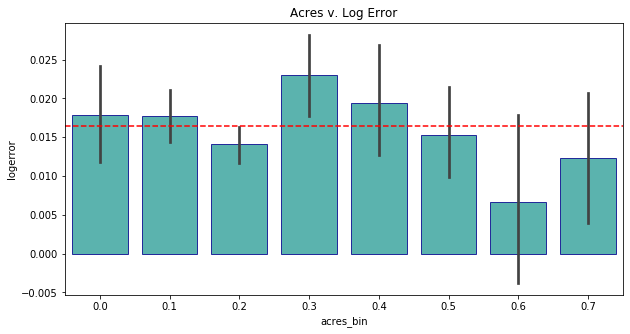

In [30]:
p = plt.figure(figsize=(10,5))
p = sns.barplot(train.acres_bin, train.logerror, data=train, alpha=.8, color='lightseagreen', edgecolor = 'darkblue')
overall_rate = train.logerror.mean()
p = plt.axhline(overall_rate, ls='--', color='red', )
plt.title('Acres v. Log Error')

Text(0.5, 1.0, 'Lot Dollar Per Square Footage v. Log Error')

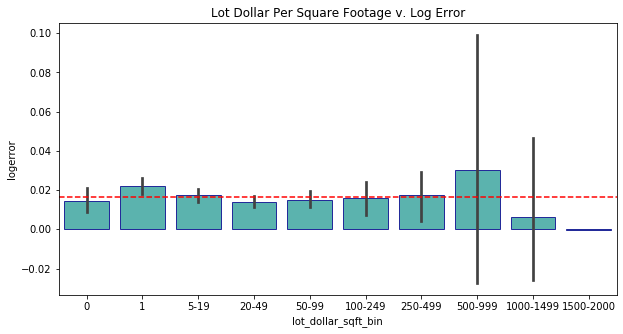

In [31]:
p = plt.figure(figsize=(10,5))
p = sns.barplot(train.lot_dollar_sqft_bin, train.logerror, data=train, alpha=.8, color='lightseagreen', edgecolor = 'darkblue')
overall_rate = train.logerror.mean()
p = plt.axhline(overall_rate, ls='--', color='red', )
plt.title('Lot Dollar Per Square Footage v. Log Error')

Text(0.5, 1.0, 'County v. Log Error')

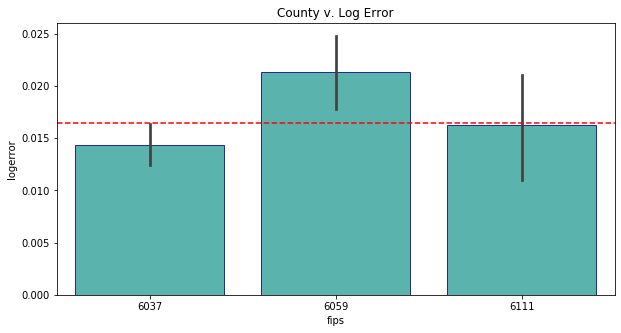

In [32]:
p = plt.figure(figsize=(10,5))
p = sns.barplot(train.fips,train.logerror, alpha=.8, color='lightseagreen', edgecolor = 'darkblue')
overall_rate =(train.logerror.mean())
p = plt.axhline(overall_rate, ls='--', color='red')
plt.title('County v. Log Error')

### Takeaways: 
- Hypothesis testing shows: There is a relationship between counties and log error.
- Hypothesis testing shows: There correlation between square footage and log error.
- Visualization shows: as dollar per square foot of land price increases, properties as a whole are undervalued by Zillow.
- Visualization shows: as acreage of land increases, properties as a whole are overvalued by Zillow.

<a id='CL'></a>
## ```Cluster Data```
[back](#back) | [next](#all)

### Split to create y_train, y_validate, y_test and Scale Data

In [33]:
np.random.seed(123)

In [34]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.data_split(df)

In [35]:
X_train, X_validate, X_test, y_train, y_validate, y_test, X_unscaled = wrangle.scaled_data(X_train, X_validate, X_test, y_train, y_validate, y_test)

<a id='all'></a>
#### ```Cluster on all Columns```
[back](#back) | [next](#land)

In [36]:
X = X_train

# Make the kmeans object
kmeans = KMeans(n_clusters=4)

# fit the kmeans model
kmeans.fit(X)

# use the thing
kmeans.predict(X)

array([0, 1, 0, ..., 2, 2, 2], dtype=int32)

In [37]:
X_train.shape, X_validate.shape, X_test.shape

((38835, 16), (16644, 16), (13870, 16))

In [38]:
X_train.columns

Index(['bathrooms', 'bedrooms', 'square_feet', 'fips', 'latitude', 'longitude',
       'age', 'structure_tax_value', 'tax_value', 'land_tax_value',
       'taxamount', 'acres', 'structure_dollar_per_sqft',
       'land_dollar_per_sqft', 'bath_bed_ratio', 'cola'],
      dtype='object')

In [39]:
X_train["cluster_all"] = kmeans.predict(X)
X_validate['cluster_all'] = kmeans.predict(X_validate)
X_test['cluster_all'] = kmeans.predict(X_test)

In [40]:
X.head()

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bath_bed_ratio,cola,cluster_all
0,0.166667,0.333333,0.088894,0.0,0.589381,0.669595,0.456522,0.057297,0.177240,0.175609,0.154379,0.008115,0.109072,0.062633,0.166667,0.0,0
1,0.166667,0.166667,0.100334,0.0,0.555030,0.520939,0.369565,0.041100,0.061868,0.045434,0.052700,0.026685,0.072638,0.005155,0.285714,1.0,1
2,0.166667,0.166667,0.031220,0.0,0.448288,0.525143,0.318841,0.031542,0.083936,0.080044,0.071659,0.010607,0.098198,0.022185,0.285714,0.0,0
3,0.333333,0.500000,0.340562,0.0,0.513403,0.575186,0.449275,0.037221,0.032336,0.011908,0.031440,0.008580,0.026271,0.004116,0.196429,1.0,1
4,0.166667,0.333333,0.111535,0.0,0.590837,0.648049,0.442029,0.016427,0.015817,0.007444,0.012834,0.012647,0.027128,0.001799,0.166667,0.0,0


In [41]:
X.cluster_all.value_counts()

0    15490
2    11214
1     8922
3     3209
Name: cluster_all, dtype: int64

In [42]:
cluster0 = X[X.cluster_all == 0]
cluster1 = X[X.cluster_all == 1]
cluster2 = X[X.cluster_all == 2]
cluster3 = X[X.cluster_all == 3]

In [43]:
cluster0.describe()

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bath_bed_ratio,cola,cluster_all
count,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.000000,15490.0,15490.0
mean,0.190198,0.331386,0.132148,0.000269,0.516241,0.688403,0.365526,0.050907,0.075653,0.054947,0.067447,0.037862,0.073108,0.018527,0.195250,0.0,0.0
std,0.143174,0.155661,0.086564,0.008934,0.177714,0.107148,0.164612,0.045555,0.074259,0.066927,0.058984,0.100574,0.043907,0.029978,0.102624,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000157,0.304907,0.007246,0.000034,0.001453,0.000467,0.001400,0.000499,0.000091,0.000004,0.000000,0.0,0.0
25%,0.166667,0.166667,0.073880,0.000000,0.379686,0.610331,0.231884,0.025739,0.032399,0.012038,0.033400,0.006460,0.047168,0.002547,0.107143,0.0,0.0
50%,0.166667,0.333333,0.111058,0.000000,0.481323,0.696365,0.391304,0.040351,0.057265,0.035946,0.053787,0.008144,0.067948,0.008766,0.166667,0.0,0.0
75%,0.333333,0.500000,0.166706,0.000000,0.563195,0.749112,0.471014,0.061441,0.092860,0.072471,0.081608,0.016474,0.090787,0.025365,0.285714,0.0,0.0
max,1.000000,1.000000,0.911821,0.297297,1.000000,0.957180,1.000000,0.923273,0.950246,0.856412,0.756417,1.000000,1.000000,0.725208,1.000000,0.0,0.0


In [44]:
cluster1.describe()

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bath_bed_ratio,cola,cluster_all
count,8922.000000,8922.000000,8922.000000,8922.0,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.0,8922.0
mean,0.203897,0.303519,0.140800,0.0,0.526849,0.555974,0.407162,0.062451,0.102783,0.079624,0.088197,0.040407,0.084503,0.024853,0.224484,1.0,1.0
std,0.163506,0.165311,0.100143,0.0,0.081267,0.059745,0.181522,0.067126,0.107226,0.093117,0.090935,0.095069,0.059012,0.034938,0.121079,0.0,0.0
min,0.000000,0.000000,0.000000,0.0,0.249683,0.424844,0.007246,0.000028,0.000000,0.000000,0.001660,0.000700,0.000000,0.000000,0.000000,1.0,1.0
25%,0.166667,0.166667,0.076978,0.0,0.479611,0.511865,0.268116,0.027740,0.041586,0.023055,0.036572,0.006730,0.049077,0.003027,0.142857,1.0,1.0
50%,0.166667,0.333333,0.116301,0.0,0.542763,0.551693,0.427536,0.045294,0.074629,0.053328,0.064290,0.008482,0.075397,0.014328,0.196429,1.0,1.0
75%,0.333333,0.333333,0.173230,0.0,0.586143,0.605876,0.507246,0.072622,0.121794,0.097395,0.104131,0.020997,0.103993,0.031781,0.285714,1.0,1.0
max,1.000000,1.000000,0.978908,0.0,0.671479,0.689728,0.949275,0.950135,0.996108,0.990538,1.000000,0.914897,0.747232,0.805044,1.000000,1.0,1.0


In [45]:
cluster2.describe()

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bath_bed_ratio,cola,cluster_all
count,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.000000,11214.0,11214.0
mean,0.233399,0.353071,0.165558,0.293347,0.249158,0.866739,0.271304,0.061884,0.107594,0.086005,0.086745,0.008171,0.070593,0.039668,0.215658,0.0,2.0
std,0.146767,0.171022,0.114499,0.034042,0.086105,0.073952,0.128177,0.064957,0.098587,0.087011,0.077331,0.007602,0.037560,0.050390,0.088979,0.0,0.0
min,0.000000,0.000000,0.000119,0.000000,0.000000,0.514246,0.007246,0.000000,0.004248,0.000049,0.000000,0.000052,0.000023,0.000004,0.000000,0.0,2.0
25%,0.166667,0.166667,0.087345,0.297297,0.188178,0.809019,0.173913,0.025822,0.051256,0.034406,0.041314,0.005993,0.045475,0.013589,0.151786,0.0,2.0
50%,0.250000,0.333333,0.135546,0.297297,0.245108,0.868578,0.275362,0.041878,0.084320,0.067368,0.067345,0.007980,0.064302,0.026772,0.196429,0.0,2.0
75%,0.333333,0.500000,0.212673,0.297297,0.318606,0.928224,0.369565,0.070971,0.129010,0.109000,0.103962,0.007980,0.090533,0.047702,0.285714,0.0,2.0
max,1.000000,1.000000,1.000000,0.297297,0.591912,1.000000,0.833333,1.000000,1.000000,1.000000,0.807009,0.206709,0.916007,1.000000,1.000000,0.0,2.0


In [46]:
cluster3.describe()

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bath_bed_ratio,cola,cluster_all
count,3209.000000,3209.000000,3209.000000,3209.0,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.0,3209.0
mean,0.229043,0.384128,0.169247,1.0,0.611928,0.258832,0.268685,0.069311,0.091833,0.060824,0.073922,0.012481,0.083924,0.022578,0.191994,0.0,3.0
std,0.138912,0.155706,0.109870,0.0,0.044335,0.099811,0.130014,0.048240,0.067608,0.053880,0.052745,0.026014,0.031223,0.026342,0.077133,0.0,0.0
min,0.000000,0.000000,0.002622,1.0,0.481355,0.000000,0.000000,0.003617,0.003670,0.000720,0.000590,0.000000,0.012530,0.000023,0.017857,0.0,3.0
25%,0.166667,0.333333,0.093184,1.0,0.576311,0.154892,0.173913,0.040593,0.051453,0.027520,0.041360,0.006561,0.065931,0.009206,0.151786,0.0,3.0
50%,0.166667,0.333333,0.142159,1.0,0.608108,0.275940,0.268116,0.059190,0.079308,0.048255,0.064137,0.007980,0.082712,0.017188,0.166667,0.0,3.0
75%,0.250000,0.500000,0.212583,1.0,0.634049,0.342078,0.369565,0.083275,0.112377,0.079714,0.091669,0.010016,0.102134,0.028219,0.226190,0.0,3.0
max,1.000000,1.000000,0.912893,1.0,0.767707,0.441902,0.927536,0.541369,0.710272,0.639348,0.524534,0.558971,0.249166,0.401209,0.642857,0.0,3.0


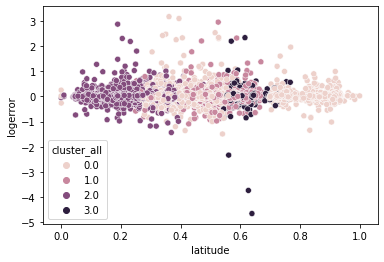

In [47]:
sns.scatterplot(x=X.latitude, y=y_train.logerror, hue=(X.cluster_all))

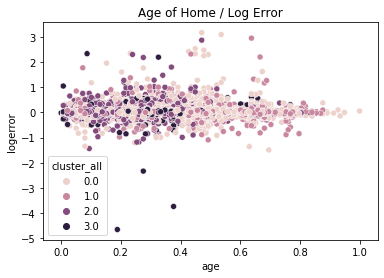

In [48]:
sns.scatterplot(x=X.age, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Age of Home / Log Error')
plt.show()

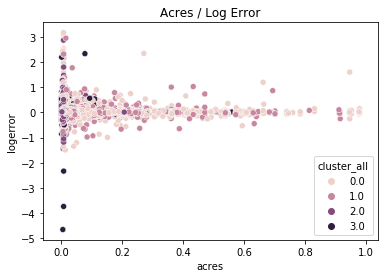

In [49]:
sns.scatterplot(x=X.acres, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Acres / Log Error')
plt.show()

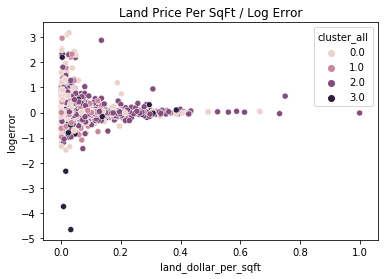

In [50]:
sns.scatterplot(x=X.land_dollar_per_sqft, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Land Price Per SqFt / Log Error')
plt.show()

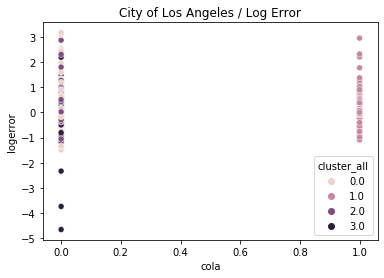

In [51]:
sns.scatterplot(x=X.cola, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('City of Los Angeles / Log Error')
plt.show()

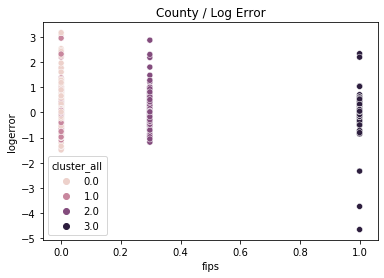

In [52]:
sns.scatterplot(x=X.fips, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('County / Log Error')
plt.show()

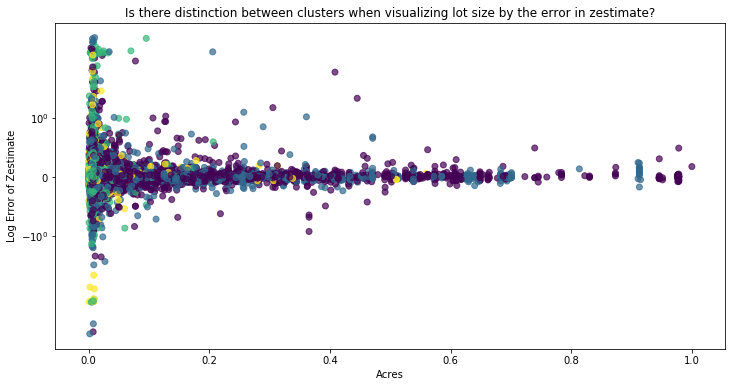

In [53]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.acres, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Acres')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing lot size by the error in zestimate?')
plt.show()

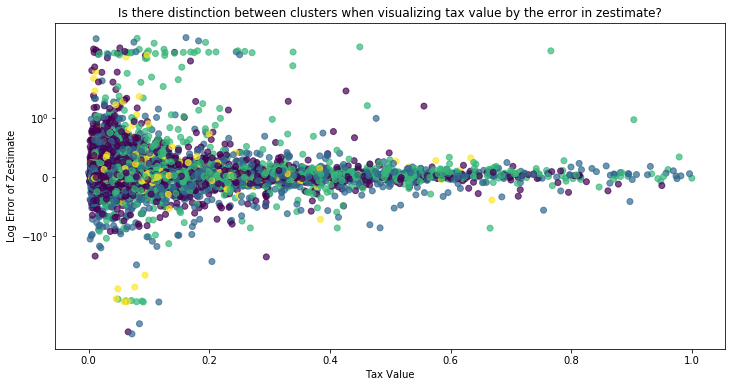

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.tax_value, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Tax Value')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing tax value by the error in zestimate?')
plt.show()

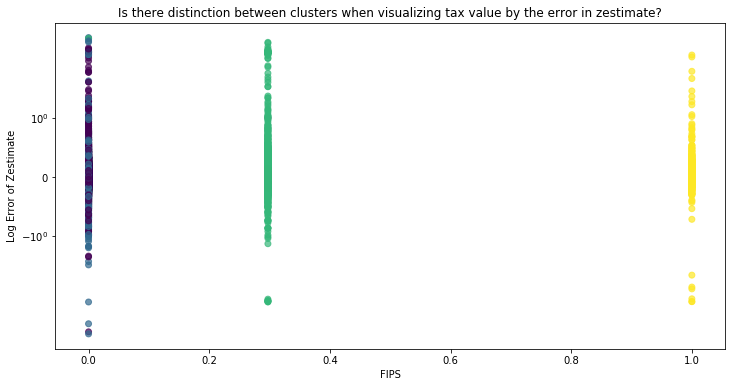

In [55]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.fips, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('FIPS')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing tax value by the error in zestimate?')
plt.show()

<a id='land'></a>
#### ```Cluster on Land Columns (size,cost,age)```
[back](#back) | [next](#location)

In [56]:
X1 = X_train[['land_dollar_per_sqft', 'tax_value', 'age']]
X2 = X_validate[['land_dollar_per_sqft', 'tax_value', 'age']]
X3 = X_test[['land_dollar_per_sqft', 'tax_value', 'age']]
# Make the kmeans object
kmeans = KMeans(n_clusters=5)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

array([3, 3, 0, ..., 3, 0, 2], dtype=int32)

In [57]:
X_train['cluster_sca'] = kmeans.predict(X1)
X_validate['cluster_sca'] = kmeans.predict(X2)
X_test['cluster_sca'] = kmeans.predict(X3)

In [58]:
sca_centers=kmeans.cluster_centers_

In [59]:
X_train.head(1)

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bath_bed_ratio,cola,cluster_all,cluster_sca
0,0.166667,0.333333,0.088894,0.0,0.589381,0.669595,0.456522,0.057297,0.17724,0.175609,0.154379,0.008115,0.109072,0.062633,0.166667,0.0,0,3


<a id='location'></a>
#### ```Cluster on Location Columns (latitude, longitude, cola, fips)```
[back](#back) | [next](#tax)

In [60]:
X1 = X_train[['latitude', 'longitude', 'cola', 'fips']]
X2 = X_validate[['latitude', 'longitude', 'cola', 'fips']]
X3 = X_test[['latitude', 'longitude', 'cola', 'fips']]
# Make the kmeans object
kmeans = KMeans(n_clusters=3)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

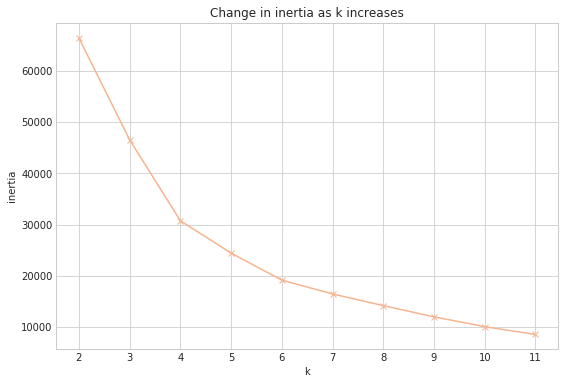

In [61]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [62]:
X_train['cluster_location'] = kmeans.predict(X1)
X_validate['cluster_location'] = kmeans.predict(X2)
X_test['cluster_location'] = kmeans.predict(X3)

In [63]:
loc_centers= kmeans.cluster_centers_

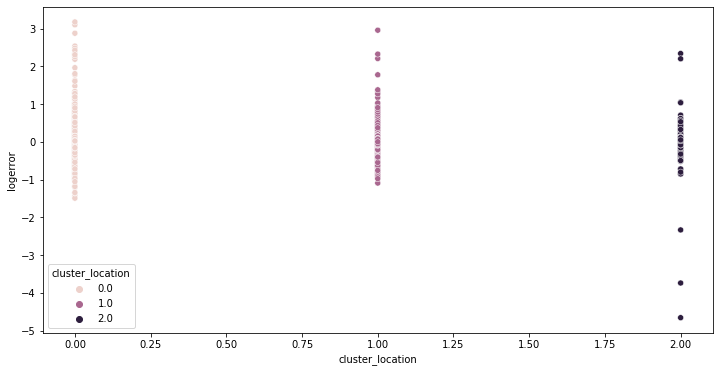

In [64]:
plt.figure(figsize=(12,6))
p= sns.scatterplot(x=X_train.cluster_location, y=y_train.logerror, hue=X_train.cluster_location)
p

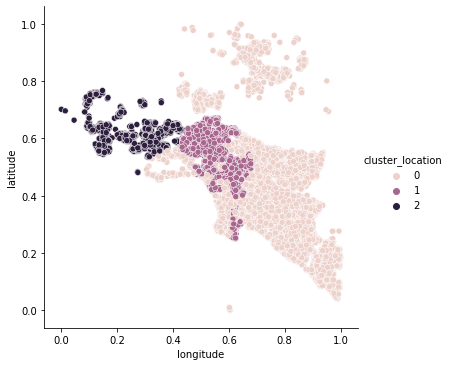

In [65]:
sns.relplot(x="longitude", y="latitude", hue="cluster_location", data=X_train)

<a id='tax'></a>
#### ```Cluster on Tax (structure_tax_value, land_tax_value, taxamount)```
[back](#back) | [next](#misc)

In [66]:
X1 = X_train[['structure_tax_value', 'land_tax_value', 'taxamount']]
X2 = X_validate[['structure_tax_value', 'land_tax_value', 'taxamount']]
X3 = X_test[['structure_tax_value', 'land_tax_value', 'taxamount']]

# Make the kmeans object
kmeans = KMeans(n_clusters=5)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

array([4, 1, 0, ..., 0, 0, 1], dtype=int32)

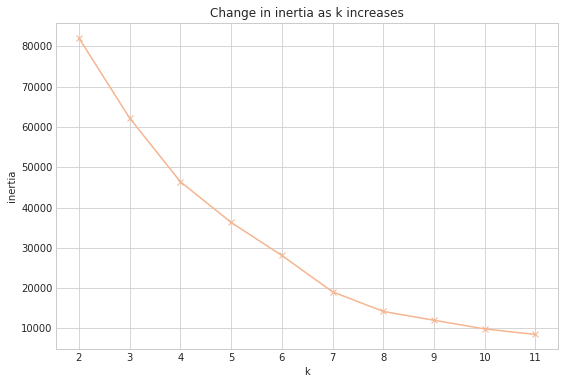

In [67]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [68]:
X_train['cluster_tax'] = kmeans.predict(X1)
X_validate['cluster_tax'] = kmeans.predict(X2)
X_test['cluster_tax'] = kmeans.predict(X3)

In [69]:
kmeans.cluster_centers_

array([[0.056981  , 0.0759202 , 0.0810728 ],
       [0.03231152, 0.02254507, 0.03485217],
       [0.34025813, 0.53194844, 0.52077188],
       [0.1913843 , 0.28399327, 0.28194188],
       [0.10597105, 0.14548487, 0.15136584]])

In [70]:
X_train.head(1)

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bath_bed_ratio,cola,cluster_all,cluster_sca,cluster_location,cluster_tax
0,0.166667,0.333333,0.088894,0.0,0.589381,0.669595,0.456522,0.057297,0.17724,0.175609,0.154379,0.008115,0.109072,0.062633,0.166667,0.0,0,3,0,4


 <a id='misc'></a>
#### ```Cluster on Misc (age, acres, structure_dollar_per_sqft)```
[back](#back) | [next](#HC)

In [71]:
X1 = X_train[['age', 'acres', 'structure_dollar_per_sqft']]
X2 = X_validate[['age', 'acres', 'structure_dollar_per_sqft']]
X3 = X_test[['age', 'acres', 'structure_dollar_per_sqft']]
# Make the kmeans object
kmeans = KMeans(n_clusters=5)

# fit the kmeans model
kmeans.fit(X1)

# use the thing
kmeans.predict(X1)

array([0, 0, 4, ..., 0, 4, 1], dtype=int32)

In [72]:
X_train['cluster_misc'] = kmeans.predict(X1)
X_validate['cluster_misc'] = kmeans.predict(X2)
X_test['cluster_misc'] = kmeans.predict(X3)

In [73]:
kmeans.cluster_centers_

array([[0.43490094, 0.01079191, 0.05916254],
       [0.10489581, 0.01647943, 0.11108201],
       [0.64299814, 0.00820248, 0.0657042 ],
       [0.2743932 , 0.44446381, 0.08979942],
       [0.26204182, 0.02702349, 0.07821854]])

In [74]:
X_train.head(1)

,bathrooms,bedrooms,square_feet,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,bath_bed_ratio,cola,cluster_all,cluster_sca,cluster_location,cluster_tax,cluster_misc
0,0.166667,0.333333,0.088894,0.0,0.589381,0.669595,0.456522,0.057297,0.17724,0.175609,0.154379,0.008115,0.109072,0.062633,0.166667,0.0,0,3,0,4,0


In [75]:
clusters= X_train[['cluster_all','cluster_sca','cluster_location', 'cluster_tax', 'cluster_misc']]
clusters.head(3)

,cluster_all,cluster_sca,cluster_location,cluster_tax,cluster_misc
0,0,3,0,4,0
1,1,3,1,1,0
2,0,0,0,0,4


<a id='HC'></a>
## ```Hypothesis Testing on Clusters```
[back](#back) | [next](#Model)

In [76]:
X_train = X_train.astype({'cluster_sca': 'category', 'cluster_location': 'category', 'cluster_tax': 'category','cluster_misc': 'category'})

dummy_df = pd.get_dummies(X_train[['cluster_sca','cluster_location','cluster_tax','cluster_misc']])

In [77]:
X_validate = X_validate.astype({'cluster_sca': 'category', 'cluster_location': 'category', 'cluster_tax': 'category','cluster_misc': 'category'})
X_test = X_test.astype({'cluster_sca': 'category', 'cluster_location': 'category', 'cluster_tax': 'category','cluster_misc': 'category'})

In [78]:
dummy_df2 = pd.get_dummies(X_validate[['cluster_sca','cluster_location','cluster_tax','cluster_misc']])
dummy_df3 = pd.get_dummies(X_test[['cluster_sca','cluster_location','cluster_tax','cluster_misc']])

In [79]:
# append dummy df cols to the original df. 
X_train = pd.concat([X_train, dummy_df], axis=1)
X_validate = pd.concat([X_validate, dummy_df2], axis=1)
X_test = pd.concat([X_test, dummy_df3], axis=1)

In [80]:
cl_train, cl_validate, cl_test = wrangle.clusters_hypothesis_split()

In [81]:
cl_train = pd.concat([cl_train, dummy_df], axis=1)

#### ```Hypothesis Test:```
$H_0$: properties have the same mean logerror in each location_cluster. <br>

$H_a$: properties in cluster_location_0 have a higher mean log error. <br>

alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [82]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
null_hypothesis = "properties have the same mean logerror in each location_cluster."

In [83]:
x1 = cl_train[cl_train.cluster_location_0 == 1].logerror
x2 = cl_train[cl_train.cluster_location_0 != 1].logerror

t, p= stats.ttest_ind(x1, x2)

if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We reject the null hypothesis that properties have the same mean logerror in each location_cluster.


<a id='Model'></a>

## ```Modeling```

[back](#back) | [next](#base)

### Feature Engineering

In [84]:
#SelectKBest

skb_features = wrangle.select_kbest(X_train, y_train, 5)
skb_features


['bathrooms', 'bedrooms', 'square_feet', 'cola', 'cluster_location_1']

In [85]:
# RFE

In [86]:
rfe_features = wrangle.rfe(X_train, y_train, 5)
rfe_features

['square_feet', 'fips', 'age', 'taxamount', 'cluster_location_2']

<a id='base'></a>
#### ```Create Baseline Model```
[back](#back) | [next](#ols)

In [87]:
# 1. Predict logerror_mean
logerror_pred_mean = y_train.logerror.mean()
y_train['logerror_pred_mean'] = logerror_pred_mean
y_validate['logerror_pred_mean'] = logerror_pred_mean

# 2. compute logerror_logerrorpred_median
logerror_pred_median = y_train.logerror.median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median

# 3. RMSE of tax_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# 4. RMSE of tax_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median) ** (1/2)
rmse_validate_baseline = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median) ** (1/2)
print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate_baseline)

RMSE using Mean
Train/In-Sample:  0.16471743733642322 
Validate/Out-of-Sample:  0.16847821920209324
RMSE using Median
Train/In-Sample:  0.165016885314455 
Validate/Out-of-Sample:  0.16880432248345412


In [88]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_mean)}])

<a id='ols'></a>
#### ```Linear Regression Model (OLS Regressor)```
[back](#back) | [next](#lasso)

In [89]:
# Creating dataframe of cluster_location_1 for modeling
X_train_cl1 = pd.DataFrame(X_train.cluster_location_1)
X_validate_cl1 = pd.DataFrame(X_validate.cluster_location_1)
X_test_cl1 = pd.DataFrame(X_test.cluster_location_1)

In [90]:
#make the thing
lm = LinearRegression(normalize=True)
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 

lm.fit(X_train_cl1, y_train.logerror)

# predict train
# 
# use the thing!
# 
y_train['logerror_pred_lm'] = lm.predict(X_train_cl1)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm) ** (1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate_cl1)

# evaluate: rmse
rmse_validate_ols = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_ols)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.16464462486784714 
Validation/Out-of-Sample:  0.16850981826728345


In [91]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_ols,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm)}, ignore_index=True)
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,0.168478,0.000000
1,OLS Regressor,0.168510,-0.000375


<a id='lasso'></a>
#### ```Lasso + LARS```
[back](#back) | [next](#lm2)

In [92]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train_cl1, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_cl1)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars) ** (1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_cl1)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  0.16471743733642322 
Validation/Out-of-Sample:  0.16847821920209324


In [93]:
metric_df = metric_df.append({
    'model': 'Lasso LARS', 
    'RMSE_validate': rmse_validate_lars,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lars)}, ignore_index=True)
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,0.168478,0.000000e+00
1,OLS Regressor,0.168510,-3.752293e-04
2,Lasso LARS,0.168478,1.110223e-16


<a id='lm2'></a>
#### ```Polynomial Regression```
[back](#back) | [next](#TD)

In [94]:
from sklearn.preprocessing import PolynomialFeatures
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree = pf.fit_transform(X_train_cl1)

# transform X_validate_scaled & X_test_scaled
X_validate_degree = pf.transform(X_validate_cl1)
X_test_degree =  pf.transform(X_test_cl1)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree, y_train.logerror)

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2) ** (1/2)

# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2) ** (1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm2, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm2)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.16464462486784714 
Validation/Out-of-Sample:  0.16850981826728345


In [95]:
metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate_lm2,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm2)}, ignore_index=True)
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,0.168478,0.000000e+00
1,OLS Regressor,0.168510,-3.752293e-04
2,Lasso LARS,0.168478,1.110223e-16
3,Quadratic Model,0.168510,-3.752293e-04


<a id='TD'></a>
## ```Model on Test Data```
[back](#back) | [next](#Concl)

In [97]:
# predict on test
y_test['logerror_pred_lm2'] = lm2.predict(X_test_degree)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.logerror, y_test.logerror_pred_lm2) ** (1/2)

print("RMSE for Model using \nOut-of-Sample Performance: ", rmse_test)

RMSE for Model using 
Out-of-Sample Performance:  0.16038474864220675


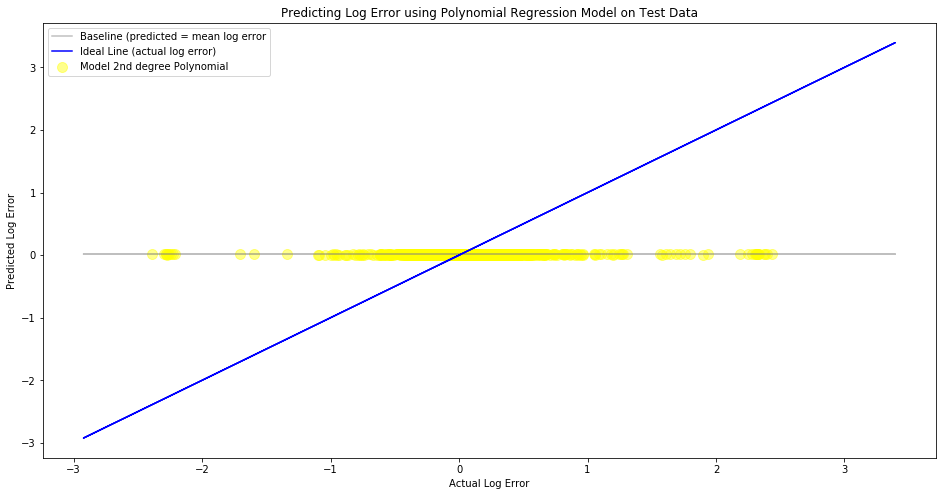

In [98]:
plt.figure(figsize=(16,8))
plt.plot(y_validate.logerror, y_validate.logerror_pred_mean, alpha=.5, color="gray", label='Baseline (predicted = mean log error')
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.999, color="blue", label='Ideal Line (actual log error)')

plt.scatter(y_test.logerror, y_test.logerror_pred_lm2, 
            alpha=.45, color="yellow", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Log Error")
plt.ylabel("Predicted Log Error")
plt.title("Predicting Log Error using Polynomial Regression Model on Test Data")
plt.show()

In [ ]:
X_unscaled= pd.concat([X_unscaled, dummy_df3], axis=1)
X_unscaled['cluster_location_1'].describe()

#### Takeaways:
##### KBest found Clusters_Location_1 to be the best performing cluster. 
##### RFE found cluster_sca_3 and cluster_location_2 to be the best performing cluster.
##### Clusters_Location_1 was chosen to be fit on the models.
##### All models performed similarly but the quadratic model slightly outperformed baseline.
##### The out of sample performance was 0.16.

<a id='Concl'></a>

## ```Conclusion```

[back to top](#back)

Overall, predicting log error is difficult to perform due to none of the features having a strong relationship with log error.<br>

This could be caused by over cleaning data, not having enough outside features collected, or changing social trends in property buying. <br>

Out of the available data and clusters, cluster_location_1 was built from latitude, longitude, cola, fips. This was chosen used as the best feature for modeling.<br>

Due to time constraints, we were unable to model Test on lassoLars. Under previous iterations, the best performing model was the quadratic model just slightly outperforming baseline. With this iteration, none of the models outperformed baseline.<br>

Given more time and resources, model on cluster_location_2 to see if that cluster predicts logerror better than cluster_location_1. We would also identify the characteristics of the clusters. 